In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
from tensorflow.keras.datasets import fashion_mnist

In [49]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
x_train=x_train/255
x_test=x_test/255

In [52]:
# import numpy as np
# x_train=np.expand_dims(x_train,axis=-1)

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

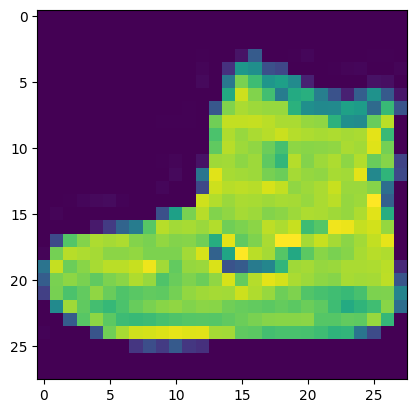

In [55]:

import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [62]:
import numpy as np
x_train_dim = np.expand_dims(x_train, axis=-1)
x_test_dim = np.expand_dims(x_test, axis=-1)

In [63]:
x_train_dim.shape

(60000, 28, 28, 1)

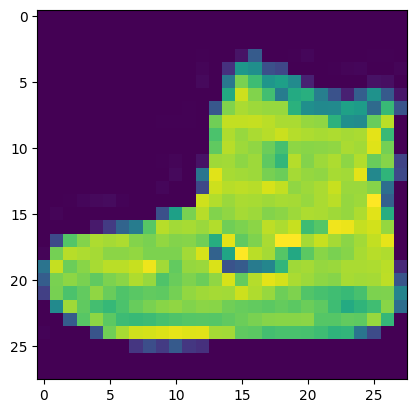

In [64]:

import matplotlib.pyplot as plt
plt.imshow(x_train_dim[0])

In [65]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [66]:
classess=["shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


In [70]:
def plot_sample(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classess[y[index]])

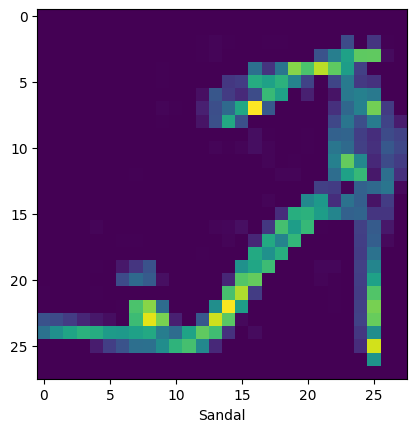

In [73]:
plot_sample(x_train,y_train,8)

In [106]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid"),


    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    keras.layers.Dense(10,activation="softmax")
])

In [107]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train_dim,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7759 - loss: 0.6316
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8869 - loss: 0.3383
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9034 - loss: 0.2949
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9132 - loss: 0.2713
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9243 - loss: 0.2442
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9299 - loss: 0.2304
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9357 - loss: 0.2122
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9380 - loss: 0.2057
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9444 - loss: 0.1956
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9491 - loss: 0.1833


In [115]:
model.evaluate(x_test_dim,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9175 - loss: 0.2966


[0.296735942363739, 0.9146999716758728]

In [119]:
y_pred=model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[6.2632488e-08, 1.4680328e-09, 4.2825771e-08, ..., 7.2757201e-04,
        2.9631346e-08, 9.9923313e-01],
       [2.5865720e-07, 2.5745235e-12, 9.9999952e-01, ..., 7.0186223e-13,
        3.9318696e-12, 6.9212511e-15],
       [4.5562706e-11, 1.0000000e+00, 4.6712612e-12, ..., 7.4133335e-16,
        1.4896577e-11, 3.1671148e-14],
       ...,
       [1.8269731e-07, 5.9118048e-09, 1.5476039e-07, ..., 2.3827312e-07,
        9.9999535e-01, 2.7416256e-09],
       [3.0627834e-07, 9.9998486e-01, 3.0690435e-07, ..., 8.9734255e-11,
        1.4934638e-08, 2.1425743e-09],
       [1.0024582e-05, 2.7995852e-06, 2.5083895e-05, ..., 6.3150518e-02,
        9.0197235e-04, 1.2192349e-03]], dtype=float32)

In [123]:
import numpy as np

y_pred=[np.argmax(i)for i in  y_pred]

In [125]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [126]:
y_pred[:5]

[9, 2, 1, 1, 6]

In [127]:
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report

In [128]:
accuracy_score(y_test,y_pred)

0.9147

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.85      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.87      0.88      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.78      0.76      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [132]:
c=confusion_matrix(y_test,y_pred)
c

array([[841,   0,  24,  20,   2,   1, 105,   0,   7,   0],
       [  0, 983,   0,  10,   2,   0,   3,   0,   2,   0],
       [ 11,   0, 848,  10,  62,   0,  68,   0,   1,   0],
       [  9,   3,  13, 934,  15,   0,  25,   0,   1,   0],
       [  0,   0,  32,  28, 878,   0,  61,   0,   1,   0],
       [  0,   0,   0,   0,   0, 978,   0,  15,   1,   6],
       [ 91,   2,  44,  25,  53,   0, 780,   0,   5,   0],
       [  0,   0,   0,   0,   0,   7,   0, 979,   0,  14],
       [  3,   0,   6,   2,   3,   0,   4,   7, 975,   0],
       [  0,   0,   0,   0,   0,   5,   0,  44,   0, 951]])

In [133]:
import seaborn as sns

<Axes: >

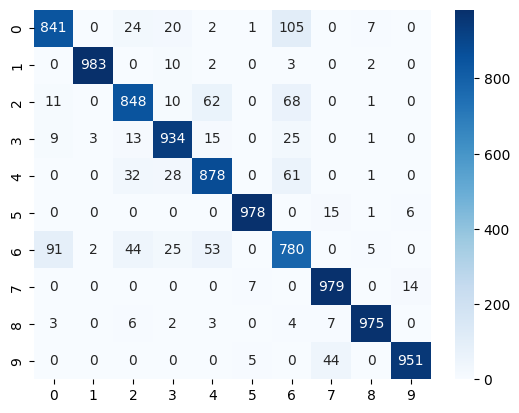

In [136]:
sns.heatmap(c,annot=True,fmt="d",cmap="Blues")